In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("cardio_train.csv", sep=";")
df.describe()



,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [58]:
df["cardio"].value_counts()

cardio
0    35021
1    34979
Name: count, dtype: int64

#### Fråga 1
34 979 människor är positiva för hjärt-kärlsjukdom, och 35 021 är negativa.

Text(0.5, 1.0, 'Kolesterol')

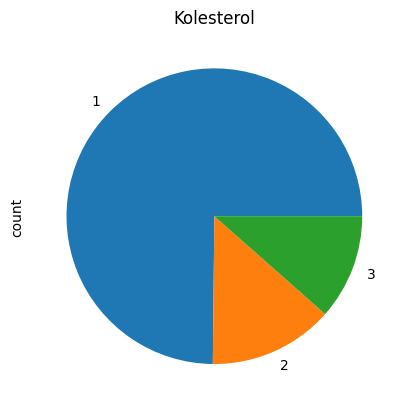

In [59]:
df["cholesterol"].value_counts().plot(kind="pie")
plt.title("Kolesterol")

#### Fråga 2
Se cirkeldiagram ovan. Vi ser att ca 3/4 av testpersonerna har normala kolesterolvärden (Kategori 1), medan vi har ca 1/8 över det normala (Kat 2) och ytterligare 1/8 långt över det normala (Kat 3).

<Axes: xlabel='age', ylabel='Count'>

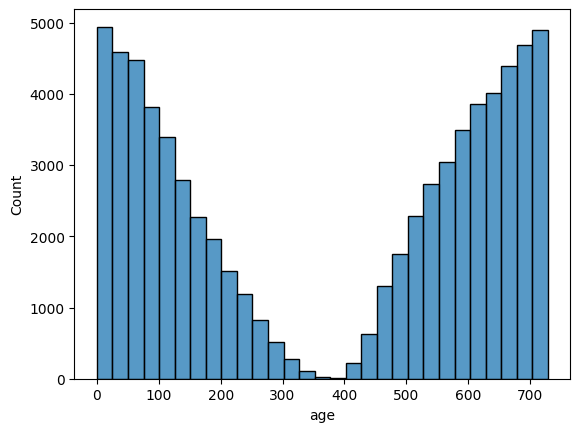

In [60]:
df["age"]=df["age"] % 730
sns.histplot(df["age"])

Skriv lite här om skumma åldersfördelningen...


In [61]:
df["smoke"].value_counts(normalize=True)

smoke
0    0.911871
1    0.088129
Name: proportion, dtype: float64

#### Fråga 4
Vi ser att ca 91% är icke-rökare (Kategori 0), medan ca 9% är rökare (1).

<Axes: xlabel='weight', ylabel='Count'>

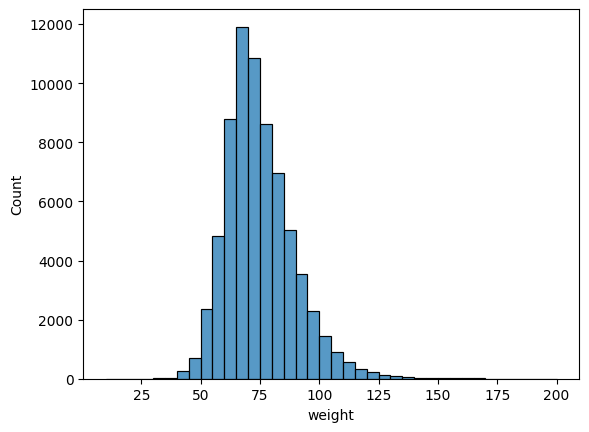

In [63]:
sns.histplot(df["weight"], binwidth=5)

#### Fråga 5
I histogrammet ovan ser vi fördelningen av vikterna, i 5-kilosintervall. Fördelningen är ganska lik en normalfördelning med ett medelvärde kring 75, men det ser ut som att det även finns ganska många överviktiga, kanske inte så förvånande när det handlar om hjärtsjukdomar.

<Axes: ylabel='height'>

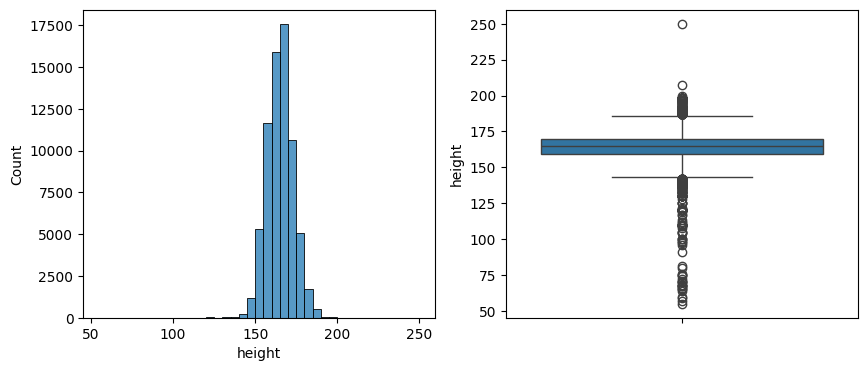

In [77]:
fig, ax=plt.subplots(1, 2, figsize=(10,4))
sns.histplot(df["height"], binwidth=5, ax=ax[0])
sns.boxplot(df["height"], ax=ax[1])


#### Fråga 6
Vi ritar ett histogram över kroppslängderna, med klassbredden 5 cm. Vid en första anblick ser det ganska normalt ut, något som påminner om en normalfördelning med medelvärde kring 165 cm. Men vi blir lite misstänksamma när x-skalan går ända från 50 till 250 cm. Finns det möjligen ett fåtal utliggare vars staplar är så låga så att de inte syns? En titt i _df.describe()_-tabellen bekräftar våra misstankar, och för att tydligare se dessa utliggare ritar vi även ett boxplot-diagram över kroppslängderna.

I boxplotten ser vi ett ganska smalt kvartilavstånd, vilket är naturligt när det gäller kroppslängder. Det är många utliggare, vilket ju inte är konstigt i ett dataset med 70 000 poster. Men vissa av utliggarna ser misstänkta ut. Framför allt har vi en stor grupp mellan ca 55 och 80 cm (och därefter ett litet "hopp" till de mer normala utliggarna). Det verkar högst osannolikt att det finns så många dvärgar i den undersökta gruppen. Det skulle kunna vara så att någon råkat ange dessa personers längder i tum istället för cm. Om vi multiplicerar dem med 2.54 (antalet cm på en tum), får vi längder i storleksordningen 140-200 cm, vilket låter mer normalt.

Vi har även en person på 250 cm, vilket är bland de längsta någonsin i världshistorien. Det _kan_ vara korrekt, men troligen är detta också en inkorrekt angivelse. Kanske ska det stå "150" men någon har råkat skriva en 1:a som är lik en 2:a.

<Axes: ylabel='count'>

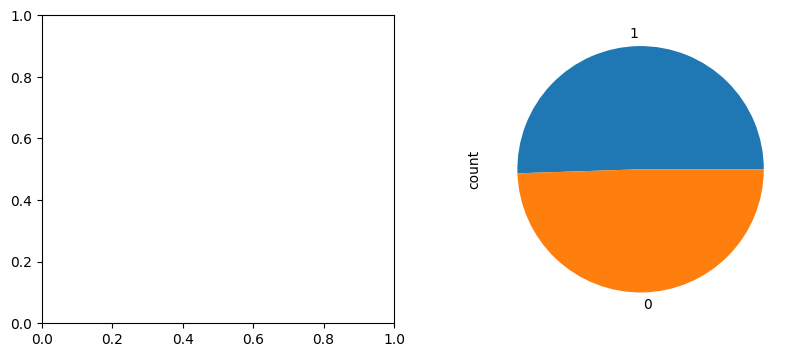

In [90]:
df_male=df[df["gender"]==2]
df_female=df[df["gender"]==1]

fig, ax=plt.subplots(1, 2, figsize=(10,4))
df_male["cardio"].value_counts().plot(kind="pie")
